In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load merged dataset
file_path = "processed_metadata_with_stage_categories.csv"
df = pd.read_csv(file_path)
print("Dataset Shape:", df.shape)

C:\Users\88018\AppData\Local\Temp\ipykernel_6288\2201430592.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset Shape: (246, 49395)


In [3]:
# check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])


Missing Values:
 stage    148
dtype: int64


In [4]:
# summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


Summary Statistics for Numerical Columns:
              age  11715100_at  11715101_s_at  11715102_x_at  11715103_x_at  \
count  246.000000   246.000000     246.000000     246.000000     246.000000   
mean    68.906504     3.288019       4.102380       3.375700       3.557335   
std     10.737850     0.556674       0.464731       0.524666       0.424345   
min     25.000000     2.265800       2.922400       2.392600       2.429300   
25%     63.250000     2.923250       3.795850       3.041750       3.269725   
50%     70.000000     3.200600       4.054750       3.284550       3.489650   
75%     77.000000     3.478275       4.360975       3.567525       3.721675   
max     88.000000     6.066900       5.967600       5.852600       5.410700   

       11715104_s_at  11715105_at  11715106_x_at  11715107_s_at  \
count     246.000000   246.000000     246.000000     246.000000   
mean        5.275933     2.342817       2.645889       2.344843   
std         2.122396     0.541065       0.23

In [5]:
# summary of categorical columns
categorical_columns = ["sample_type", "stage_category", "location", "gender"]
for col in categorical_columns:
    print(f"\nValue Counts for {col}:\n", df[col].value_counts())


Value Counts for sample_type:
 sample_type
Normal    98
Tumor     98
Mucosa    50
Name: count, dtype: int64

Value Counts for stage_category:
 stage_category
Unknown         148
Intermediate     98
Name: count, dtype: int64

Value Counts for location:
 location
Left     143
Right    103
Name: count, dtype: int64

Value Counts for gender:
 gender
Male      169
Female     77
Name: count, dtype: int64


In [6]:
df.tail()

,geo_accession,sample_type,individual_id,stage,stage_category,location,gender,age,status,11715100_at,...,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
241,GSM1077839,Tumor,Y2099,IIA,Intermediate,Right,Male,72,Public on Mar 14 2014,2.7624,...,1.8331,2.3223,2.3968,2.1180,6.9047,4.9615,5.9032,2.0684,1.9758,2.2050
242,GSM1077840,Tumor,Z2015,IIA,Intermediate,Right,Male,84,Public on Mar 14 2014,2.5775,...,2.1370,2.0858,2.2515,2.0265,7.0130,4.9894,5.8160,1.9110,2.1660,2.0183
243,GSM1077841,Tumor,Z2038,IIA,Intermediate,Right,Female,65,Public on Mar 14 2014,3.1441,...,1.8654,2.4228,2.1907,2.2586,6.4545,4.3336,5.1489,2.1146,2.0619,2.0312
244,GSM1077842,Tumor,Z2061,IIA,Intermediate,Left,Male,53,Public on Mar 14 2014,4.8256,...,1.9590,2.4964,2.0703,2.1757,6.9920,4.9551,6.0431,2.0207,2.2717,2.2361
245,GSM1077843,Tumor,Z2084,IIA,Intermediate,Left,Male,81,Public on Mar 14 2014,3.3535,...,1.7862,2.3495,2.7023,1.8644,6.9709,4.3106,5.6033,2.0328,2.2460,2.1781


Visualizing the Metadata

In [7]:
# set style
sns.set(style="whitegrid")

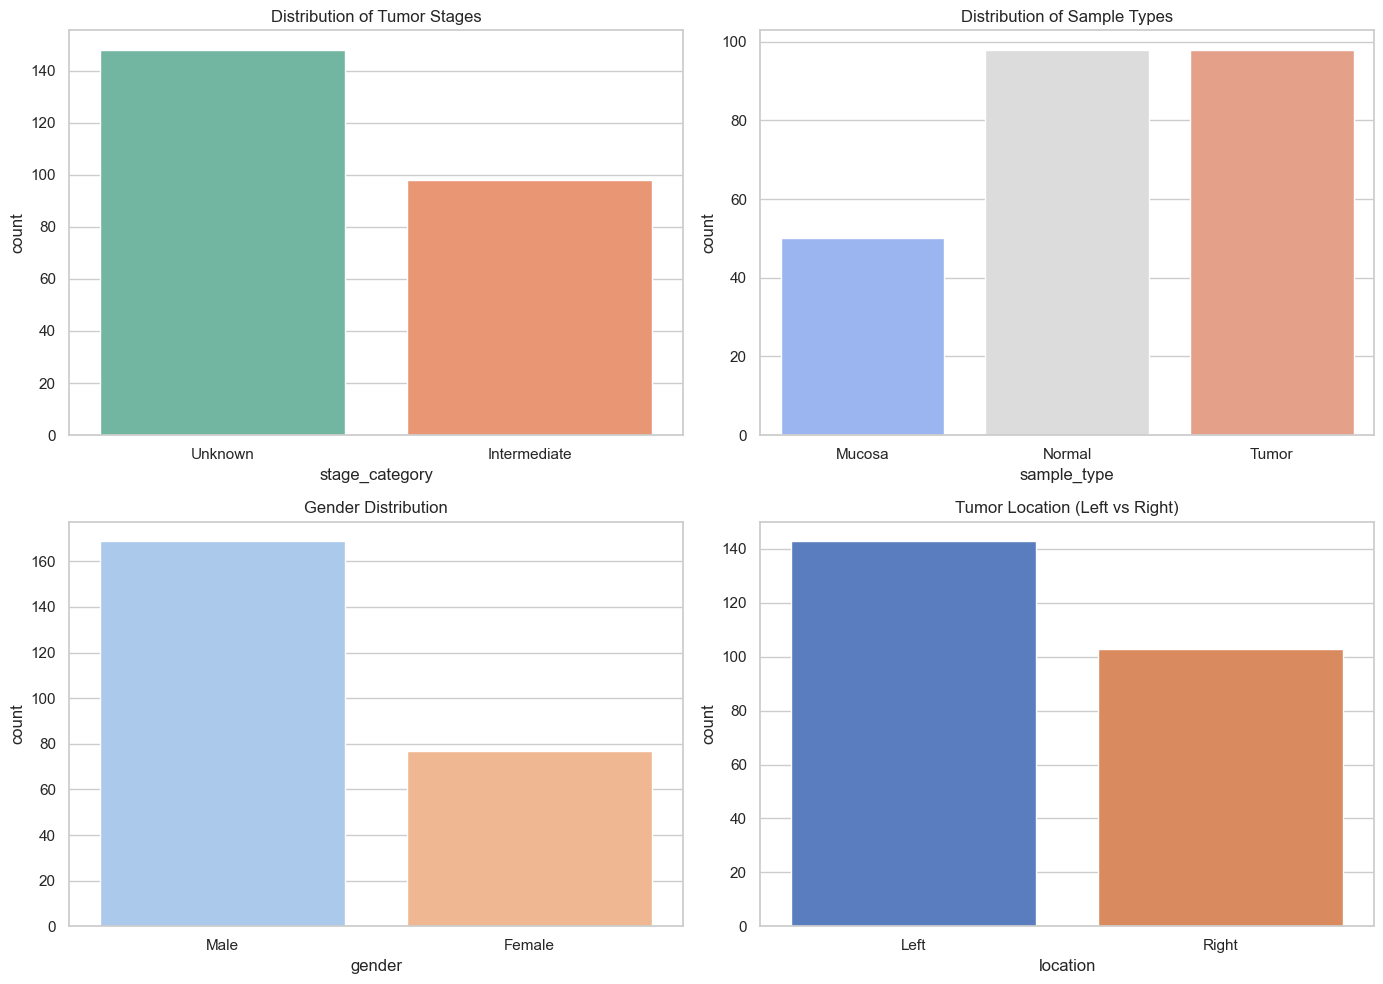

In [8]:
# Plot categorical distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(data=df, x="stage_category", ax=axes[0, 0], palette="Set2")
axes[0, 0].set_title("Distribution of Tumor Stages")

sns.countplot(data=df, x="sample_type", ax=axes[0, 1], palette="coolwarm")
axes[0, 1].set_title("Distribution of Sample Types")

sns.countplot(data=df, x="gender", ax=axes[1, 0], palette="pastel")
axes[1, 0].set_title("Gender Distribution")

sns.countplot(data=df, x="location", ax=axes[1, 1], palette="muted")
axes[1, 1].set_title("Tumor Location (Left vs Right)")

plt.tight_layout()
plt.show()

Histogram for Age Distribution

C:\Users\88018\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


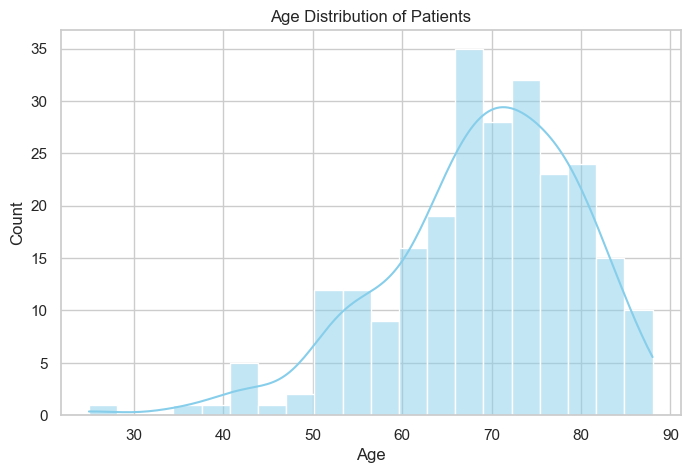

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["age"].astype(int), bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

 Correlation Heatmap for Gene Expression

In [ ]:
# select gene expression columns by ignoring metadata
#gene_expression_cols = df.iloc[:, 9:]  

# compute correlation matrix
#correlation_matrix = gene_expression_cols.corr()
#print(correlation_matrix)
# Plot optimized heatmap
#plt.figure(figsize=(12,8))
#sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5)
#plt.title("Correlation Heatmap for Genes")
#plt.show()

In [10]:
# select only gene expression columns
gene_expression_cols = df.iloc[:, 9:]  # Assuming first 8 columns are metadata

# compute variance for each gene and select top 500 most variable genes
top_variable_genes = gene_expression_cols.var().sort_values(ascending=False).head(500).index

correlation_matrix = gene_expression_cols[top_variable_genes].corr(method="spearman")
print(correlation_matrix)

               11729583_x_at  11728771_a_at  11736649_x_at  11736648_at  \
11729583_x_at       1.000000       0.819703       0.497775     0.505674   
11728771_a_at       0.819703       1.000000       0.579253     0.583000   
11736649_x_at       0.497775       0.579253       1.000000     0.990546   
11736648_at         0.505674       0.583000       0.990546     1.000000   
11729582_s_at       0.969655       0.817908       0.522052     0.531398   
...                      ...            ...            ...          ...   
11717862_x_at      -0.194393      -0.194902      -0.140562    -0.138580   
11717566_at         0.704721       0.822091       0.526472     0.528799   
11717067_a_at      -0.190877      -0.237989      -0.167857    -0.171158   
11718620_a_at       0.499077       0.460614       0.328419     0.332868   
11717909_at         0.219212       0.163843       0.077228     0.070873   

               11729582_s_at  11722059_at  11715386_at  11733744_at  \
11729583_x_at       0.969655

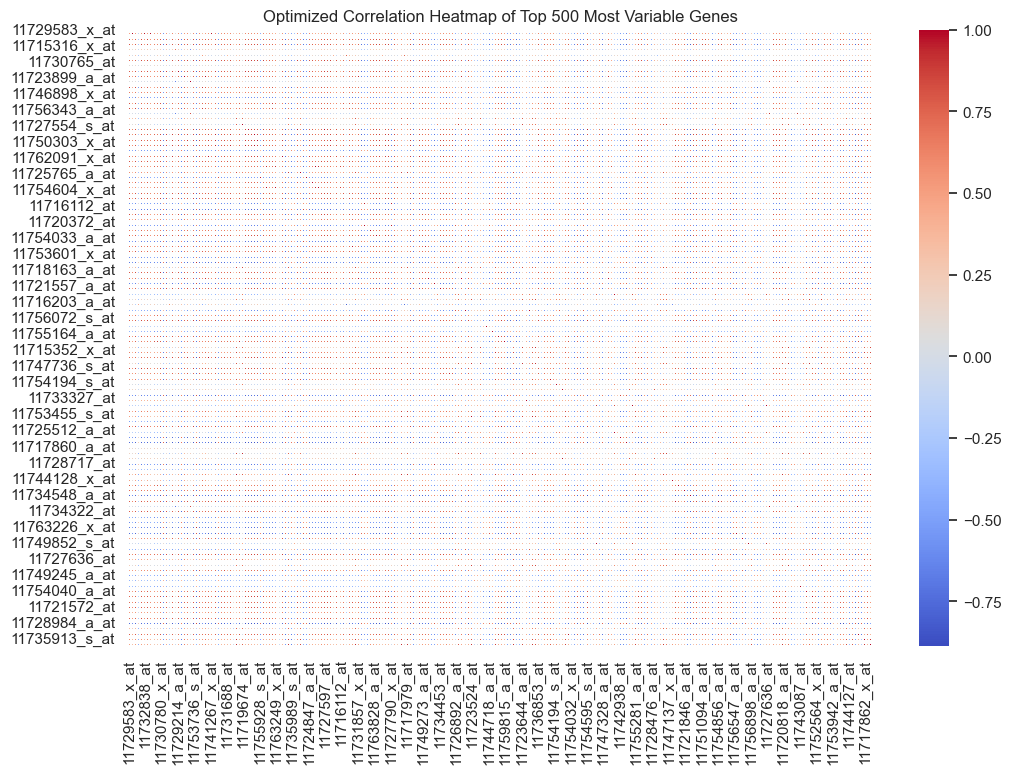

In [11]:
#heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Optimized Correlation Heatmap of Top 500 Most Variable Genes")
plt.show()